In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv("tesla_2024_2025.csv")

df

,date,open,close,volume,high,low,range,daily_change,percent_change
0,2024-01-03,244.98000,238.45000,121082600,245.67999,236.32001,9.35999,-6.53000,-2.66552
1,2024-01-04,239.25000,237.92999,102629300,242.70000,237.73000,4.97000,-1.32001,-0.55173
2,2024-01-05,236.86000,237.49001,92379400,240.12000,234.89999,5.22000,0.63000,0.26598
3,2024-01-08,236.14000,240.45000,85166600,241.25000,235.30000,5.95000,4.31000,1.82519
4,2024-01-09,238.11000,234.96001,96705700,238.96001,232.03999,6.92001,-3.14999,-1.32292
...,...,...,...,...,...,...,...,...,...
334,2025-05-05,284.57001,280.26001,94618900,284.85001,274.39999,10.45001,-4.31000,-1.51456
335,2025-05-06,273.10999,275.35001,76715800,277.73001,271.35001,6.38000,2.24002,0.82019
336,2025-05-07,276.88000,276.22000,71592600,277.92001,271.00000,6.92001,-0.66000,-0.23837
337,2025-05-08,279.63000,284.82001,97539400,289.79999,279.41000,10.38998,5.19000,1.85602


In [121]:
# Calculate 1st, 2nd derivatives of closing price
#    ** note: daily_change is the price movement within the day **
#    ** note: velocity is if the price is moving up/down vs yesterday **
#    ** note: acceleration is if the price momentum is increasing or fading (reversal hint) **

df["velocity"] = df["close"].diff()         
# Velocity: 1st derivative — trend for change in closing price between consecutive days

df["acceleration"] = df["velocity"].diff()  
# Acceleration: 2nd derivative —  trend for change in velocity between consecutive days


In [122]:
df[df.isnull().any(axis=1)]

,date,open,close,volume,high,low,range,daily_change,percent_change,velocity,acceleration
0,2024-01-03,244.98,238.45000,121082600,245.67999,236.32001,9.35999,-6.53000,-2.66552,NaN,NaN
1,2024-01-04,239.25,237.92999,102629300,242.70000,237.73000,4.97000,-1.32001,-0.55173,-0.52001,NaN


In [123]:
# Proves dataset has all non-null values
df = df.dropna().reset_index(drop=True)
df[df.isna().any(axis=1)]

,date,open,close,volume,high,low,range,daily_change,percent_change,velocity,acceleration


In [124]:
df.describe()

,open,close,volume,high,low,range,daily_change,percent_change,velocity,acceleration
count,337.000000,337.000000,3.370000e+02,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,251.561929,251.539228,9.800028e+07,257.508546,245.333739,12.174807,-0.022700,0.069876,0.179021,0.041424
std,78.519519,78.166128,3.545431e+07,80.601599,75.674039,7.719614,8.594544,3.205100,11.296451,15.902777
min,140.560000,142.050000,3.716760e+07,144.440000,138.800000,2.960010,-30.390000,-12.033740,-40.520020,-70.140030
25%,186.980000,187.910000,7.274650e+07,191.080000,182.840000,6.850010,-3.980000,-1.710100,-5.669990,-8.080000
50%,230.090000,230.289990,8.944150e+07,235.000000,223.880000,9.909990,-0.230010,-0.092810,-0.159990,0.560020
75%,280.010010,282.760010,1.144403e+08,289.590000,272.420010,14.970000,3.970000,1.782530,6.150000,8.229990
max,475.899990,479.859990,2.438697e+08,488.540010,457.510010,61.530000,47.510010,21.144690,50.340010,61.770000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            337 non-null    object 
 1   open            337 non-null    float64
 2   close           337 non-null    float64
 3   volume          337 non-null    int64  
 4   high            337 non-null    float64
 5   low             337 non-null    float64
 6   range           337 non-null    float64
 7   daily_change    337 non-null    float64
 8   percent_change  337 non-null    float64
 9   velocity        337 non-null    float64
 10  acceleration    337 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 29.1+ KB


In [126]:
def find_outliers_iqr(df, column):                                 # method for finding outliers:
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

outliers_range = find_outliers_iqr(df, "acceleration")              # now find outliers in the "acceleration" column. early predictors?
display(outliers_range)

,date,open,close,volume,high,low,range,daily_change,percent_change,velocity,acceleration
79,2024-04-30,186.98000,183.28000,127031800,190.95000,182.84000,8.11000,-3.70000,-1.97882,-10.77000,-36.53001
138,2024-07-25,216.80000,220.25000,100636500,226.00000,216.23000,9.77000,3.45000,1.59133,4.25999,34.64998
202,2024-10-24,244.67999,260.48001,204491900,262.12000,242.64999,19.47000,15.80002,6.45742,46.83002,51.15003
203,2024-10-25,256.01001,269.19000,161611900,269.48999,255.32001,14.16998,13.17999,5.14823,8.70999,-38.12003
215,2024-11-12,342.73999,328.48999,155726000,345.84000,323.31000,22.53000,-14.25000,-4.15767,-21.51001,-50.29001
240,2024-12-18,466.50000,440.13000,149340800,488.54001,427.01001,61.53000,-26.37000,-5.65273,-39.72999,-56.56999
241,2024-12-19,451.88000,436.17001,118566100,456.35999,420.01999,36.34000,-15.70999,-3.47658,-3.95999,35.77000
245,2024-12-26,465.16000,454.13000,76366400,465.32999,451.01999,14.31000,-11.03000,-2.37123,-8.15000,-39.82999
250,2025-01-03,381.48001,410.44000,95423300,411.88000,379.45001,32.42999,28.95999,7.59148,31.16000,55.72000
257,2025-01-15,409.89999,428.22000,81375500,429.79999,405.66000,24.13998,18.32001,4.46938,31.86001,38.81002


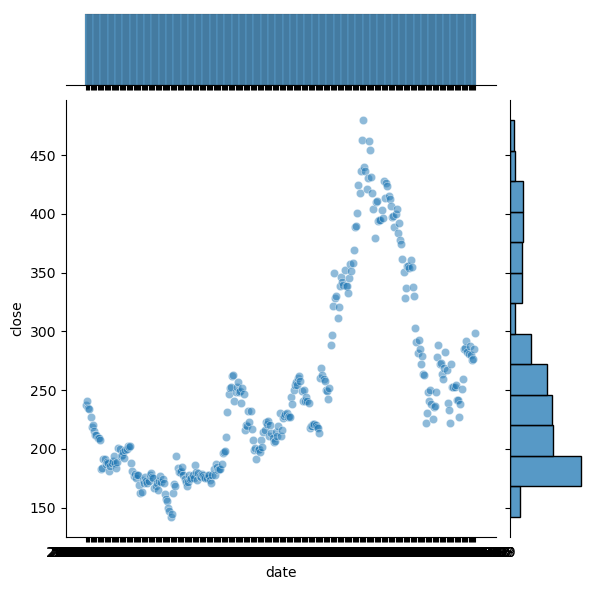

In [127]:
sns.jointplot(x="date", y="close", data=df, alpha=0.5)   # concentration of points (alpha)

In [128]:
# Trend Reversals in finance: indicate a shift in the direction of an asset's price (here, we use velocity as the indicator)
df["reversal_type"] = np.where(
    (df["velocity"].shift(1) > 0) & (df["velocity"] < 0), -1,  # downward turn
    np.where(
        (df["velocity"].shift(1) < 0) & (df["velocity"] > 0), 1, # upward turn
        0                                                        # no reversal
    )
)
df["reversal_binary"] = df["reversal_type"].replace({-1:1,1:1,0:0})
df

,date,open,close,volume,high,low,range,daily_change,percent_change,velocity,acceleration,reversal_type,reversal_binary
0,2024-01-05,236.86000,237.49001,92379400,240.12000,234.89999,5.22000,0.63000,0.26598,-0.43998,0.08003,0,0
1,2024-01-08,236.14000,240.45000,85166600,241.25000,235.30000,5.95000,4.31000,1.82519,2.95999,3.39997,1,1
2,2024-01-09,238.11000,234.96001,96705700,238.96001,232.03999,6.92001,-3.14999,-1.32292,-5.48999,-8.44998,-1,1
3,2024-01-10,235.10001,233.94000,91628500,235.50000,231.28999,4.21001,-1.16000,-0.49341,-1.02001,4.46998,0,0
4,2024-01-11,230.57001,227.22000,105873600,230.92999,225.37000,5.56000,-3.35001,-1.45292,-6.72000,-5.69999,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2025-05-05,284.57001,280.26001,94618900,284.85001,274.39999,10.45001,-4.31000,-1.51456,-6.94998,-13.63998,-1,1
333,2025-05-06,273.10999,275.35001,76715800,277.73001,271.35001,6.38000,2.24002,0.82019,-4.91000,2.03998,0,0
334,2025-05-07,276.88000,276.22000,71592600,277.92001,271.00000,6.92001,-0.66000,-0.23837,0.86999,5.77999,1,1
335,2025-05-08,279.63000,284.82001,97539400,289.79999,279.41000,10.38998,5.19000,1.85602,8.60001,7.73002,0,0


In [129]:
# Binary Classifier: defining features
features = ["velocity", "acceleration", "range", "percent_change", "volume", "high", "low"]
x = df[features]
y = df["reversal_binary"]     # NOT using reversal_type

In [130]:
# Train Binary Classifiers: split with TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit             # split time series without mixing past&future
from sklearn.ensemble import RandomForestClassifier             # ML model
from sklearn.metrics import classification_report               # shows how well our model performs

tscv = TimeSeriesSplit(n_splits=5)                              # creates time-based cross validation obj, splits data into 5 chunks(splits past/future)
model = RandomForestClassifier(random_state=42)                 # creates ML model (forest of decision trees). random_state makes results reproducible

for train_index, test_index in tscv.split(x):                   # for-loop over 5 train/test splits. gets the rows for testing/training every time
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]   # splits actual features (x) and labels (y) based on row (clean sets)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(x_train, y_train)                                 # trains model on x to y set (model learns patterns from features to detect reversals)
    y_pred = model.predict(x_test)                              # uses trained model to make predictions on test set

print(classification_report(y_test, y_pred, zero_division = 0)) # precision: # of actual real predicted reversals
                                                                # recall: # of real reversals were correctly found
                                                                # F1-score: A balance of precision and recall
                                                                # zero_division: avoids dividing by zero if no positive predictions exist

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.68      0.79      0.73        24

    accuracy                           0.75        56
   macro avg       0.75      0.76      0.75        56
weighted avg       0.76      0.75      0.75        56



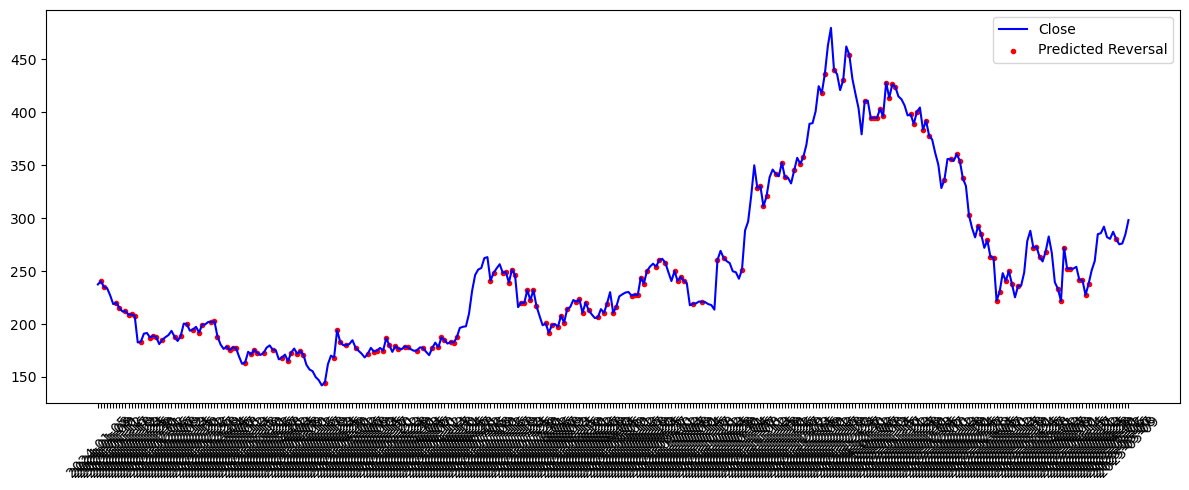

In [131]:
# Binary Classifier: Visualize Reversal Predictions (classifier performance)
df["predicted_reversal"] = model.predict(x)
plt.figure(figsize=(12, 5))
plt.plot(df["date"], df["close"], label="Close", color='blue')
plt.scatter(df[df["predicted_reversal"] == 1]["date"], 
            df[df["predicted_reversal"] == 1]["close"], 
            color='red', label="Predicted Reversal", marker='.')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
# RESULTS:
# Blue line: actual close price of Tesla over 2024-2025
# Red dots: points where the trained model predicted a momentum reversal (based on velocity/acceleration), which ties to inflection points

In [166]:
df[["date", "close", "velocity", "acceleration", "reversal_binary", "volume", "percent_change"]].to_csv("tesla_features_for_tableau.csv", index=False)
# export csv for Tableau implementation